## Оглавление
1. [Приоритизация гипотез](#prioritization)
2. [Анализ A/B-теста](#ab_test)

  2.1. [График кумулятивной выручки по группам](#cum_revenue)

  2.2. [График кумулятивного среднего чека по группам](#cum_mean)

  2.3. [График относительного изменения кумулятивного среднего чека группы B к группе A](#cum_mean_change_diagram)

  2.4. [График кумулятивной конверсии по группам](#cum_conv_diagram)

  2.5. [График относительного изменения кумулятивной конверсии группы B к группе A](#cum_conv_change_diagram)

  2.6. [Точечный график количества заказов по пользователям](#scatter_orders)

  2.7. [95-й и 99-й перцентили количества заказов на пользователя](#percentile_orders)

  2.8. [Точечный график стоимостей заказов](#scatter_revenue)

  2.9. [95-й и 99-й перцентили стоимости заказов](#percentile_revenue)

  2.10. [Статистическая значимость различий в конверсии между группами по «сырым» данным](#stat_conv_raw)

  2.11. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#stat_mean_raw)

  2.12. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#stat_conv)

  2.13. [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#stat_mean)

  2.14. [Результаты](#results)

3. [Общий вывод](#sumup)


# A/B тест для интернет-магазина
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель исследования** — приоритизировать гипотезы, запустить A/B-тест. Это позволит установить, возможно ли увеличение выручки после применения изменений, сформулированных в гипотезах.

**Ход исследования**

Перед проверкой гипотез понадобится обзор и предобработка данных.
Необходимо проверить данные на ошибки и оценить их влияние на исследование.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных и предобработка данных.
2. Приоритизация гипотез.
3. Анализ A/B-теста:
  * Мы построим:
    * График кумулятивной выручки по группам
    * График кумулятивного среднего чека по группам
    * График относительного изменения кумулятивного среднего чека группы B к группе A
    * График кумулятивной конверсии по группам
    * График относительного изменения кумулятивной конверсии группы B к группе A
    * Точечный график количества заказов по пользователям
    * Точечный график стоимостей заказов
  * Посчитаем:
    * 95-й и 99-й перцентили количества заказов на пользователя
    * 95-й и 99-й перцентили стоимости заказов
    * Статистическую значимость различий в конверсии между группами по «сырым» данным
    * Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
    * Статистическую значимость различий в конверсии между группами по «очищенным» данным
    * Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
4. Вывод о том, стоит ли продолжать тестирование, и анализ его результатов.

##  1. Приоритизация гипотез
<a name="prioritization"></a>

### Задача
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [99]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [100]:
# изучим данные

try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [101]:
#выведем общую информацию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [102]:
data.describe() # проверим на аномалии таблицу data
# аномалий нет

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [103]:
# проверим данные на наличие дубликатов
data.duplicated().sum() # дубликатов нет

0

In [104]:
# приведем названия столбцов к змеиному регистру
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [105]:
# применим фреймворк ICE для приоритизации гипотез
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'])

data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.0
0,"Добавить два новых канала привлечения трафика,...",13.0
7,Добавить форму подписки на все основные страни...,11.0
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
3,"Изменить структура категорий, что увеличит кон...",1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0


In [106]:
# применим фреймворк RICE для приоритизации гипотез
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [107]:
# сравним ICE и RICE в одной таблице
data[['hypothesis','ICE', 'RICE']].sort_values(by='ICE', ascending=False) # фильтрация по ICE

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",16.0,16.2
0,"Добавить два новых канала привлечения трафика,...",13.0,40.0
7,Добавить форму подписки на все основные страни...,11.0,112.0
6,Показать на главной странице баннеры с актуаль...,8.0,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0,56.0
1,"Запустить собственную службу доставки, что сок...",2.0,4.0
3,"Изменить структура категорий, что увеличит кон...",1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0,4.0


In [108]:
data[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False) # фильтрация по RICE

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.0,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",13.0,40.0
6,Показать на главной странице баннеры с актуаль...,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.0,16.2
3,"Изменить структура категорий, что увеличит кон...",1.0,9.0
1,"Запустить собственную службу доставки, что сок...",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0,3.0


### Вывод
После применения фреймворков гипотезы получили разный приоритет. Совершенно точно исключаются последние четыре гипотезы: номер 1, 3, 4 и 5, набравшие меньше всего баллов в обоих случаях.

Однако топ-5 для ICE и RICE выглядит совершенно по-разному благодаря влиянию параметра Reach. Восьмая гипотеза, занявшее первое место во фреймворке ICE, занимает лишь место в RICE, т.к. балл ее охвата лишь единица. Седьмая же гипотеза занимает уверенное первое место в  RICE, хотя была лишь на третьем в ICE. 

В целом, следующие гипотезы могут быть использованы для проверки: номер семь, ноль, шесть и два.
У гипотезы номер восемь очень низкий балл по охвату - один.

## 2. Анализ A/B-теста
<a name="ab_test"></a>

### Задача
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. 

     Варианты решений: 
  1. Остановить тест, зафиксировать победу одной из групп. 
  2. Остановить тест, зафиксировать отсутствие различий между группами. 
  3. Продолжить тест.

In [109]:
# изучим данные

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(5))


try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [110]:
orders.info() # выведем сводную информацию о таблице orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [111]:
visitors.info() # выведем сводную информацию о таблице visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [112]:
orders.describe() # проверим на аномалии таблицу orders
# аномалий нет

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [113]:
orders['group'].unique() # проверим на аномалии столбец group таблицы orders
# аномалий нет

array(['B', 'A'], dtype=object)

In [114]:
visitors.describe() # проверим на аномалии таблицу visitors
# аномалий нет

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [115]:
visitors['group'].unique() # проверим на аномалии столбец group таблицы visitors
# аномалий нет

array(['A', 'B'], dtype=object)

In [116]:
# проверим данные на наличие дубликатов
orders.duplicated().sum() # дубликатов нет

0

In [117]:
# проверим данные на наличие дубликатов
visitors.duplicated().sum() # дубликатов нет

0

In [118]:
# переименум столбцы 
orders = orders.rename(
columns={
'transactionId': 'transaction_id',
'visitorId': 'visitor_id',}
) 

In [119]:
# изменим тип данных в столбце с датой
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.info()
visitors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Вывод
В таблице orders 1197 строк и 5 столбцов, нет пропусков и дубликатов. Мы изменили тип столбца с датой на datetime и привели названия столбцов к змеиному регистру.

В таблице visitors 62 строки и 3 столбца, нет пропусков и дубликатов. Мы изменили тип столбца с датой на datetime.

### 1. Построим график кумулятивной выручки по группам.
<a name="cum_revenue"></a>

In [120]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

display(datesGroups['date'].max())
display(datesGroups['date'].min())

datesGroups.info()

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [121]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [122]:
# посчитаем количество уникальных пользователей в каждой из групп
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

In [123]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [124]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


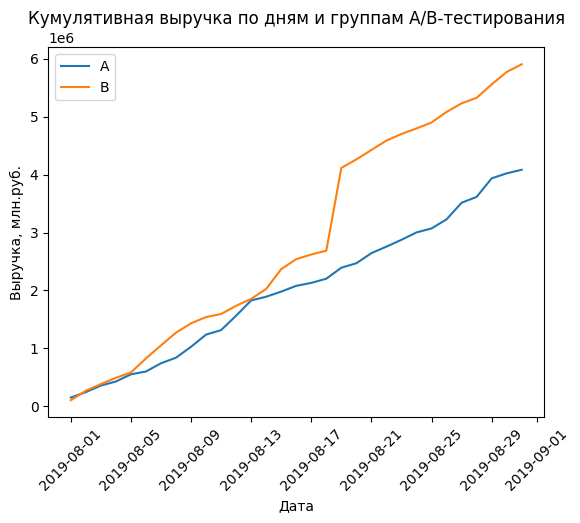

In [125]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title("Кумулятивная выручка по дням и группам A/B-тестирования")
plt.xlabel("Дата")
plt.ylabel("Выручка, млн.руб.")
plt.legend()


### Вывод
В исследовании клиенты разделены на две группы: А и В, в группе А 503 человека, в группе В — 586. Согласно графику кумулятивной выручки по дням и группам A/B-тестирования выручка для обеих групп стабильно растет. Однако для группы B в определенный момент произошел резкий скачок, возможно, это аномально большие заказы либо всплеск числа заказов. Разберемся с этим дальше.

### 2. Построим график кумулятивного среднего чека по группам.
<a name="cum_mean"></a>

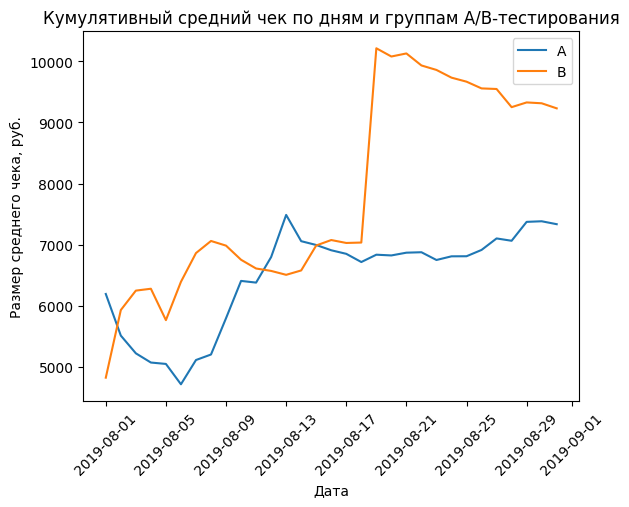

In [126]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.xlabel("Дата")
plt.ylabel("Размер среднего чека, руб.")
plt.legend()

### Вывод
Средний чек становится равномерным ближе к концу теста: установился для группы A, но падает для группы B. К тому же и здесь виден резкий скачок среднего чека группы B как и на предыдущем графике. После этого началось плавное падение. Возможно, в группу B в определенный момент теста попали крупные заказы (резкий всплеск на графике). После чего данные приходят  к реальному среднему чеку.

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

<a name="cum_mean_change_diagram"></a>



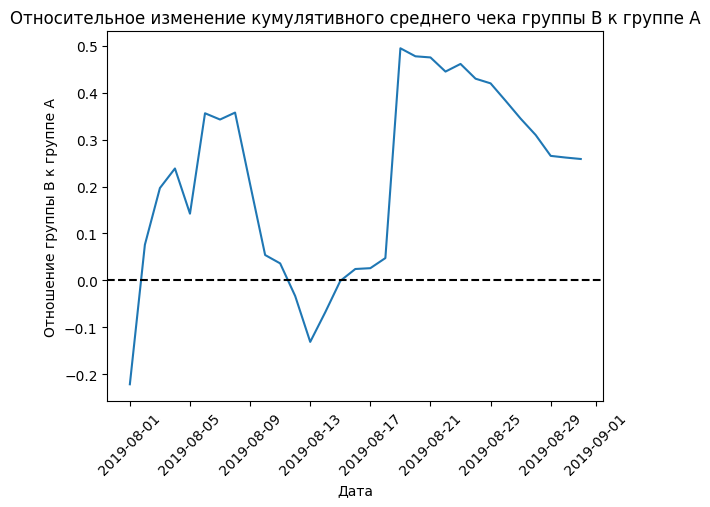

In [127]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Отношение группы В к группе А")
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')


### Вывод
В нескольких точках график различия между сегментами резко «скачет». Необходимо изучить крупные заказы и выбросы.

### 4. Построим график кумулятивной конверсии по группам.
<a name="cum_conv_diagram"></a>

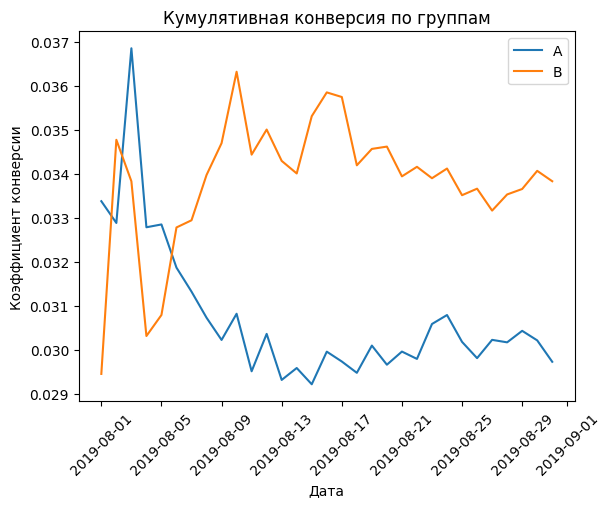

In [128]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("Дата")
plt.ylabel("Коэффициент конверсии")
plt.legend()


### Вывод
График получился достаточно симметричным. В определенный момент конверсия для группы B резко возросла, а для группы А упала. После этого резких скачков не было и показатели достаточно равномерны. Однако конверсия группы В выше конверсии группы А.

### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.
<a name="cum_conv_change_diagram"></a>

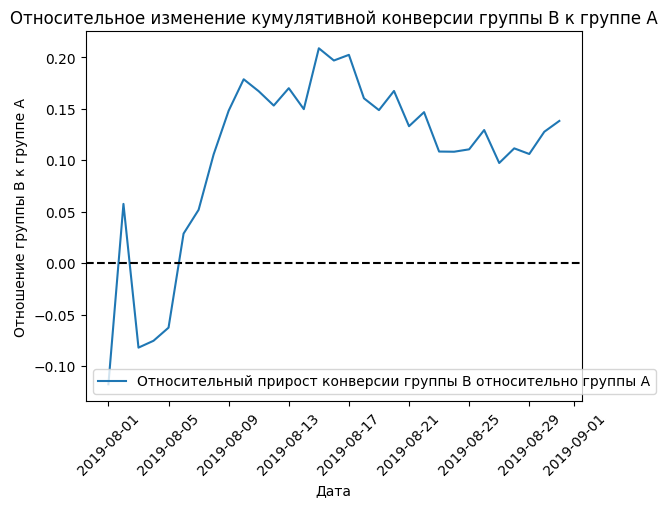

In [129]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Отношение группы В к группе А")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')


### Вывод
После резкого провала конверсии группы В в самом начале теста последовал подъем. С этого момента конверсия группы В стабильно выше.

### 6. Построим точечный график количества заказов по пользователям.
<a name="scatter_orders"></a>

In [130]:
# подсчитаем количество заказов по пользователям

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество заказов')

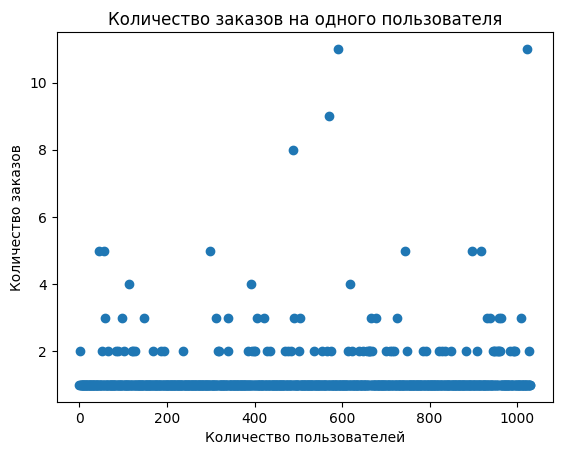

In [131]:
#  построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов на одного пользователя")
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")

### Вывод
Большинство пользователей делали один заказ, однако два-три заказа встречаются тоже часто. Четыре и более — уже редкость.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
<a name="percentile_orders"></a>

In [132]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

### Вывод
Пять процентов покупателей делали больше двух заказов, один процент — больше четырех. Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### 8. Построим точечный график стоимостей заказов.
<a name="scatter_revenue"></a>

Text(0, 0.5, 'Стоимость заказов, руб.')

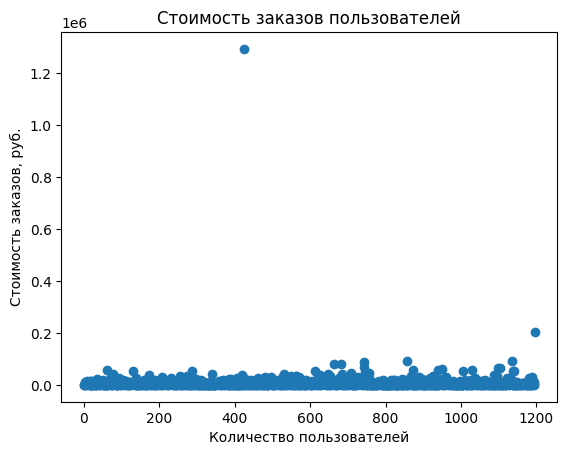

In [133]:
values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(values, orders['revenue'])
plt.title("Стоимость заказов пользователей")
plt.xlabel("Количество пользователей")
plt.ylabel("Стоимость заказов, руб.")

### Вывод
Выделяются две аномалии: заказ на 200 тыс. и на 1,2 млн.

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
<a name="percentile_revenue"></a>

In [134]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

### Вывод
Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Имеет смысл оставить в выборке заказы на сумму не выше 99 перцентиля – 58233,2 руб.

### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 
<a name="stat_conv_raw"></a>

**Нулевая гипотеза**: разница в конверсии между группами по «сырым» данным статистически незначима

**Альтернативная гипотеза**: разница в конверсии между группами по «сырым» данным статистически значима

In [135]:
# отделяем данные по группе A
data_newA = orders[orders['group']=='A']

# отделяем данные по группе B
data_newB = orders[orders['group']=='B']

#считаем количество заказов
data_newA = data_newA.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
data_newB = data_newB.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
 

In [136]:
# объединяем список с количеством заказов для каждого из пользователей с нулями для списка клиентов, которые ничего не заказали

sampleA = pd.concat([data_newA['transaction_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(data_newA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([data_newB['transaction_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(data_newB['transaction_id'])), name='orders')],axis=0)



In [137]:
# посчитаем статистическую значимость различий выборок
results_conversion_raw = stats.mannwhitneyu(sampleA, sampleB)

# выведем относительный прирост конверсии группы B
display('{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))


alpha = 0.05  # критический уровень статистической значимости

display('p-значение: ', results_conversion_raw.pvalue)

if results_conversion_raw.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
     

'0.138'

'p-значение: '

0.016792355056752608

Отвергаем нулевую гипотезу: разница статистически значима


### Вывод: 
По «сырым» данным статистическая значимость различий у групп А и В очень большая.
P-value = 0.016. Значит, мы отвергаем нулевую гипотезу: разница в конверсии между группами статистически значима. Относительный выигрыш группы B равен почти 14%.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
<a name="stat_mean_raw"></a>

**Нулевая гипотеза**: разница в среднем чеке заказа между группами по «сырым» данным статистически значима

**Альтернативная гипотеза**: разница в среднем чеке заказа между группами по «сырым» данным статистически незначима

In [138]:
results_mean_raw = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05  # критический уровень статистической значимости

display('p-значение: ', results_mean_raw.pvalue)

if results_mean_raw.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
     

'0.259'

'p-значение: '

0.7292909855432458

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### Вывод
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A — почти на 26%.

### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.
<a name="stat_conv"></a>

**Нулевая гипотеза**: разница в конверсии между группами по «очищенным» данным статистически значима

**Альтернативная гипотеза**: разница в конверсии между группами по «очищенным» данным статистически незначима

In [139]:
# сделаем срез заказов на не больше 4 заказов на одного пользователя

data_newA_reduced = data_newA.query('transaction_id < 4').groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
data_newB_reduced = data_newB.query('transaction_id < 4').groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})


In [140]:
# объединяем список с количеством заказов для каждого из пользователей с нулями для списка клиентов, которые ничего не заказали

sampleA_reduced = pd.concat([data_newA_reduced['transaction_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(data_newA_reduced['transaction_id'])), name='orders')],axis=0)

sampleB_reduced = pd.concat([data_newB_reduced['transaction_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(data_newB_reduced['transaction_id'])), name='orders')],axis=0)


In [141]:
# посчитаем статистическую значимость различий выборок
results_conversion = stats.mannwhitneyu(sampleA_reduced, sampleB_reduced) 

# выведем относительный прирост конверсии группы B по очищенным данным
display('{0:.3f}'.format(sampleB_reduced.mean()/sampleA_reduced.mean()-1))

alpha = 0.05  # критический уровень статистической значимости

display('p-значение: ', results_conversion.pvalue)

if results_conversion.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

'0.156'

'p-значение: '

0.016088438528276492

Отвергаем нулевую гипотезу: разница статистически значима


### Вывод:
По очищенным данным разница также статистически значима для групп А и В. P-value также 0.016. Значит мы отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Относительный выигрыш группы B немного больше и равен 15%.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
<a name="stat_mean"></a>

**Нулевая гипотеза**: разница в среднем чеке между группами по «очищенным» данным статистически значима

**Альтернативная гипотеза**: разница в среднем чеке между группами по «очищенным» данным статистически незначима

In [142]:
# Создадим переменные ordersByUsersA и ordersByUsersB 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

In [143]:
# сделаем срез заказов на сумму не выше 58233 руб. и количеством заказов меньше 4

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

In [144]:
results_mean = (
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05  # критический уровень статистической значимости

display('p-значение: ', results_mean.pvalue)

if results_mean.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

'-0.006'

'p-значение: '

0.8509126191381939

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### Вывод
P-value значительно больше 0.05, а по отношению к "сырым" данным этот показатель еще и вырос. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. К тому же, средний чек групп практически не отличается.

### 14. Примем решение по результатам теста и объясним его.
<a name="results"></a>

#### Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

### Результаты:
* Есть статистически значимое различие в конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть незначительная тенденция к ухудшению;
* График различия среднего чека говорит о том, что результаты группы B лучше группы А, но они ухудшаются день ото дня, несмотря на два всплеска по ходу теста.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Наблюдается статистически значимый прирост конверсии для группы В, средний чек для группы В также выше, но разница статистически не значима. Относительный прирост конверсии группы В после удаления аномалий - 15%. Прироста среднего чека по очищенным данным не наблюдается.


## Общий вывод
<a name="sumup"></a>

Мы подготовили список гипотез для увеличения выручки. Нам необходимо было приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
Это позволило бы установить, возможно ли увеличение выручки после применения изменений, сформулированных в гипотезах.

Перед проверкой гипотез мы проверили данные на ошибки и оценили их влияние на исследование.

Затем мы оценили приоритет гипотез, используя фреймворки ICE и RICE. Гипотезы получили разный приоритет. Оба фреймворка позволили нам исключить последние четыре гипотезы: номер 1, 3, 4 и 5, набравшие меньше всего баллов в обоих случаях. Однако топ-5 для ICE и RICE выглядел совершенно по-разному благодаря влиянию параметра Reach. В целом, следующие гипотезы могут быть использованы для проверки: номер семь, ноль, шесть и два. 

После этого мы построили графики кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A, точечный график количества заказов по пользователям, точечный график стоимостей заказов. И посчитали 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов, статистическую значимость различий в конверсии между группами по «сырым» и очищенным данным и статистическую значимость различий в среднем чеке заказа между группами по «сырым» и очищенным данным.

Полученные результаты позволили сделать следующие выводы:
* Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия кумулятивной конверсии между группами сообщает, что результаты группы B лучше группы A и есть незначительная тенденция к ухудшению;
* График различия кумулятивного среднего чека говорит о том, что результаты группы B лучше группы А, но они ухудшаются день ото дня, несмотря на два всплеска по ходу теста.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Наблюдается статистически значимый прирост конверсии для группы В, средний чек для группы В также выше, но разница статистически не значима. Относительный прирост конверсии группы В после удаления аномалий - 15%. Прироста среднего чека по очищенным данным не наблюдается.